In [1]:
import pandas as pd
df = pd.read_csv('../Data/Cleaned_data.csv')
df['BoRace'].value_counts()

BoRace
5    604701
7     27157
2     17991
6     15949
3     10331
1      3772
4       966
Name: count, dtype: int64

In [2]:
df = df[df['CoRace'] != 4]
min_count = df['CoRace'].value_counts().min()
df = df.groupby('CoRace').sample(n=min_count, random_state=42)
df = df.reset_index(drop=True)
df

,Year,FHLBankID,FIPSStateCode,FIPSCountyCode,MSA,MinPer,TraMedY,LocMedY,Income,CurAreY,...,CoGender,BoAge,CoAge,Rate,Amount,Front,Back,Borrower Credit Score,Co-Borrower Credit Score,Self
0,2014,6,48,201,26420,39.290,104345,63898,247428,66200,...,2,25.0,24.0,0.0450,292400,0.1100,0.1800,5.0,5,2
1,2020,4,48,29,41700,49.976,79444,66594,106848,71000,...,2,37.0,37.0,4.2500,188700,16.9800,28.1000,4.0,5,2
2,2017,4,35,1,10740,24.130,129688,60032,74880,59400,...,1,28.0,33.0,0.0413,234400,0.2510,0.4347,3.0,2,2
3,2016,5,40,115,33060,31.180,52705,47891,193631,49500,...,2,52.0,47.0,0.0388,280000,0.1197,0.3101,5.0,4,2
4,2010,2,55,87,99999,4.250,47240,50254,31419,71300,...,1,22.0,24.0,0.0450,88840,0.2529,0.3713,3.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9571,2013,10,8,31,19740,22.710,89583,75101,52000,79300,...,4,40.0,42.0,0.0350,138700,0.2085,0.2131,5.0,9,2
9572,2012,3,39,61,17140,4.360,119545,67515,99996,70400,...,4,37.0,42.0,0.0425,317500,0.3200,0.3300,4.0,9,2
9573,2014,3,18,57,26900,9.460,88278,64663,33276,67900,...,4,24.0,42.0,0.0325,50000,0.2100,0.2300,4.0,9,2
9574,2019,2,55,39,22540,2.535,74916,71680,55728,75300,...,4,51.0,42.0,3.7500,175000,36.1600,43.2000,5.0,9,1


In [3]:
df.columns

Index(['Year', 'FHLBankID', 'FIPSStateCode', 'FIPSCountyCode', 'MSA', 'MinPer',
       'TraMedY', 'LocMedY', 'Income', 'CurAreY', 'UPB', 'LTV', 'MortDate',
       'AcquDate', 'Purpose', 'Term', 'NumBor', 'BoRace', 'CoRace', 'BoGender',
       'CoGender', 'BoAge', 'CoAge', 'Rate', 'Amount', 'Front', 'Back',
       'Borrower Credit Score', 'Co-Borrower Credit Score', 'Self'],
      dtype='object')

In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import KBinsDiscretizer

# Load your DataFrame
# df = pd.read_csv("mortgage_data.csv")

# Define control variables and target
control_vars = ['Income', 'Borrower Credit Score', 'Co-Borrower Credit Score', 'Front', 'Back']
target = 'BoRace'

# Clean data
df_clean = df.dropna(subset=control_vars + [target])
df_clean = df_clean.drop(columns=["CoRace"])

# Stratify using KBinsDiscretizer (quantile binning)
binning = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
binned_controls = binning.fit_transform(df_clean[control_vars])
strata_labels = pd.Series(np.sum(binned_controls * (10 ** np.arange(binned_controls.shape[1])), axis=1), name="Stratum")

df_clean['Stratum'] = strata_labels

c:\Users\Matin\Desktop\CIS890\venv\lib\site-packages\sklearn\preprocessing\_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(


In [19]:
df_clean['Stratum']

0         212.0
1       22211.0
2       11000.0
3         112.0
4       11000.0
         ...   
9571     1210.0
9572    11211.0
9573     1210.0
9574    22210.0
9575      210.0
Name: Stratum, Length: 9576, dtype: float64

c:\Users\Matin\Desktop\CIS890\venv\lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Matin\Desktop\CIS890\venv\lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Matin\Desktop\CIS890\venv\lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Matin\Desktop\CIS890\venv\lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Matin\Desktop\CIS890\venv\lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=

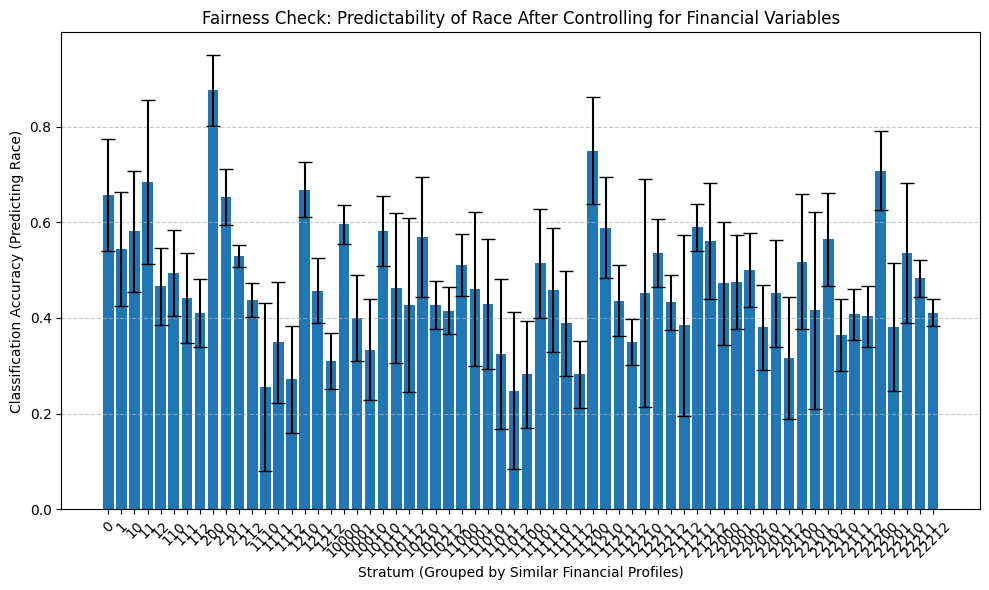

In [20]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt

# Train classification model within each stratum
results = []

for stratum, group in df_clean.groupby('Stratum'):
    if group[target].nunique() < 2 or len(group) < 30:
        continue  # Skip strata that lack enough diversity or samples

    X = group.drop(columns=[target, 'Stratum'])
    y = group[target]

    # Drop protected attributes from predictors
    X = X.drop(columns=['BoGender', 'CoGender', 'CoRace'], errors='ignore')

    model = RandomForestClassifier(random_state=42)
    scores = cross_val_score(model, X, y, cv=StratifiedKFold(n_splits=5), scoring='accuracy')

    results.append({
        'Stratum': str(int(stratum)),  # For readable x-axis
        'Samples': len(group),
        'Mean Accuracy': np.mean(scores),
        'Std Dev': np.std(scores)
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)

# === Plot the results ===
plt.figure(figsize=(10, 6))
plt.bar(results_df['Stratum'], results_df['Mean Accuracy'], yerr=results_df['Std Dev'], capsize=5)
plt.xlabel("Stratum (Grouped by Similar Financial Profiles)")
plt.ylabel("Classification Accuracy (Predicting Race)")
plt.title("Fairness Check: Predictability of Race After Controlling for Financial Variables")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [17]:
results_df

,Stratum,Samples,Mean Accuracy,Std Dev
0,0,84,0.656618,0.116993
1,1,52,0.543636,0.119282
2,10,33,0.580952,0.125628
3,11,43,0.683333,0.171549
4,12,32,0.466667,0.080531
...,...,...,...,...
59,22200,58,0.707576,0.082098
60,22201,32,0.380952,0.133843
61,22210,508,0.535954,0.146525
62,22211,553,0.482801,0.037979
